# Assignment08
# Forward Propagation in the Nueral Network
* 2019220177 Seungwook Oh


## Initial setting

### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/MIMP

/content/drive/My Drive/MIMP


### git Setting

In [3]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Assignment06/Assignment06.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Assignment08/

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git config --global user.email "sooonchang@gmail.com"
!git config --global user.name "SooonChang"

In [100]:
!git add .
!git commit -m "Assignment08: 2."
!git push origin master

[master 1e887a7] Assignment08: define class
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Assignment08/Assignment08.ipynb (83%)
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 1.25 KiB | 255.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/SooonChang/MIMP
   fde0ad8..1e887a7  master -> master


## 1. Plot the average image
* plot the average images of the same label for each digit
* arrange the subplots in 2x5 array for the 10 average images and present the label at the title of each subplot in the increasing order of the label

### import Libraries

In [0]:
import numpy as np 
import matplotlib.pyplot as plt

### Load data

In [0]:
file_data = "Assignment08/mnist_test.csv"
handle_file = open(file_data, "r")
data = handle_file.readlines()
handle_file.close()

size_row = 28
size_col = 28

num_image = len(data)
count = 0

list_image = np.empty((size_row* size_col, num_image), dtype = float)
list_label = np.empty(num_image, dtype= int)

for line in data:
  line_data = line.split(',')
  label = line_data[0]
  im_vector = np.asfarray(line_data[1:])

  list_label[count] = label
  list_image[:, count] = im_vector
  count +=1


### Calculate average image

In [0]:
img_0 = list_image[:,list_label==0]
img_1 = list_image[:,list_label==1]
img_2 = list_image[:,list_label==2]
img_3 = list_image[:,list_label==3]
img_4 = list_image[:,list_label==4]
img_5 = list_image[:,list_label==5]
img_6 = list_image[:,list_label==6]
img_7 = list_image[:,list_label==7]
img_8 = list_image[:,list_label==8]
img_9 = list_image[:,list_label==9]

In [0]:
avg_imgs = np.empty((10, size_row*size_col), dtype = float)
avg_imgs[0] = np.mean(img_0, axis=1)
avg_imgs[1] = np.mean(img_1, axis=1)
avg_imgs[2] = np.mean(img_2, axis=1)
avg_imgs[3] = np.mean(img_3, axis=1)
avg_imgs[4] = np.mean(img_4, axis=1)
avg_imgs[5] = np.mean(img_5, axis=1)
avg_imgs[6] = np.mean(img_6, axis=1)
avg_imgs[7] = np.mean(img_7, axis=1)
avg_imgs[8] = np.mean(img_8, axis=1)
avg_imgs[9] = np.mean(img_9, axis=1)

### Plot the average image

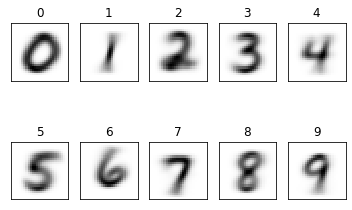

In [131]:
f1 = plt.figure(1)
for i in range(10):
  label = i
  im_vector = avg_imgs[i]

  plt.subplot(2,5,i+1)
  plt.title(label)
  plt.imshow(im_vector.reshape(size_row,size_col), cmap= 'Greys', 
             interpolation='None')
  
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.show()

## 2. Present the output of the neural network with random weights
* consider a neural network with a fully connected layer using a logistic unit without a bias
* assign random values from the normal distribution N(0,1) with mean 0 and standard deviation 1 to the weights of the fully connected layer using a logistic unit without a bias
* compute the forward propagation and take the average of the output values for the images of the same label
* present the average values for each label in the increasing order of the label

### define functions

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

class SimpleNet():

  def __init__(self, numnode):

    np.random.seed(1)
    self.network = {}
    self.network['W1'] = np.random.randn(numnode,100)
    self.network['W2'] = np.random.randn(100,10)
  
  def forward(self,x):

    W1,W2 = self.network['W1'], self.network['W2']
    y = np.dot(x,W1)
    z1 = sigmoid(y)
    y2 = np.dot(z1,W2)
    z = sigmoid(y2)

    return z


In [0]:
simple_net = SimpleNet(size_row*size_col)

In [250]:
forward = np.empty((num_image, 10), dtype= float)
for i in range(num_image):
  forward[i] = simple_net.forward(list_image[:,i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [253]:
avg_forward = np.empty((10,10), dtype=float)
for i in range(10):
  tmp = forward[list_label==i, :]
  avg_forward[i] = np.mean(tmp, axis=0)

  print("label ", i, "avg_output ")
  print(avg_forward[i])

label  0 avg_output 
[0.44650577 0.89775615 0.17962486 0.69867256 0.71232562 0.10675687
 0.12239837 0.53423445 0.889598   0.05738193]
label  1 avg_output 
[0.66389357 0.75294318 0.20429209 0.76583806 0.76148842 0.19867561
 0.06986858 0.11843334 0.99540557 0.37027018]
label  2 avg_output 
[0.44677841 0.89366622 0.17872425 0.77563238 0.79818626 0.08739171
 0.15010676 0.42398401 0.97378873 0.17407687]
label  3 avg_output 
[0.55597905 0.97229946 0.20430649 0.65687797 0.65098063 0.22392675
 0.29638533 0.32828569 0.99022759 0.14819077]
label  4 avg_output 
[0.70312993 0.94079097 0.24960931 0.77947475 0.81227325 0.02590997
 0.4746663  0.43440735 0.9922257  0.07393103]
label  5 avg_output 
[0.69897557 0.98520619 0.2614096  0.73779364 0.65282681 0.13002417
 0.22911012 0.27940451 0.96922896 0.06664537]
label  6 avg_output 
[0.68288868 0.84697292 0.23810351 0.76820437 0.7233432  0.05104649
 0.12145006 0.58509105 0.95830127 0.09250859]
label  7 avg_output 
[0.61946403 0.84783413 0.31254894 0.65040